# Movie Rating Prediction Model

## Khám phá dữ liệu phục vụ cho việc tiền xử lý

### Import các thư viện

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pwd

/c/NM_KHDL/Do_an_Nhom/Movie-Rating-Prediction-Model/notebooks


### Load vào dữ liệu thô sau khi đã được crawl

In [4]:
file_path = "../data/raw/IMDB_movies_final.csv"
df = pd.read_csv(file_path)

### Thông tin cơ bản

Dữ liệu sau khi load được lưu vào biến `df`. Để có cái nhìn bao quát về cấu trúc và đặc điểm của dataset, nhóm hiển thị 5 dòng đầu và 5 dòng cuối của dữ liệu như sau 

In [5]:
# Hiển thị 5 dòng đầu
df.head()

,rank,title,genres,budget,release_year,run_time,mpa,metascore,vote_count,rating
0,1,Frankenstein,"Drama, Fantasy, Horror, Sci-Fi","$120,000,000 (estimated)",2025.0,2h 29m,R,77.0,(132K),7.6
1,2,One Battle After Another,"Action, Crime, Drama, Thriller","$130,000,000 (estimated)",2025.0,2h 41m,R,95.0,(163K),8.0
2,3,The Running Man,"Action, Adventure, Sci-Fi, Thriller","$110,000,000 (estimated)",2025.0,2h 13m,R,56.0,(17K),6.7
3,4,Predator: Badlands,"Action, Adventure, Sci-Fi, Thriller","$105,000,000 (estimated)",2025.0,1h 47m,PG-13,71.0,(38K),7.5
4,5,Playdate,"Action, Comedy","$17,525",2025.0,1h 33m,PG-13,20.0,(10K),5.5


In [6]:
# Hiển thị 5 dòng cuối
df.tail()

,rank,title,genres,budget,release_year,run_time,mpa,metascore,vote_count,rating
10043,10046,Return of the Living Dead III,Horror,"$2,000,000 (estimated)",1993.0,1h 37m,NaN,47.0,(18K),5.9
10044,10047,Sweetness,Thriller,NaN,2025.0,1h 33m,NaN,NaN,(81),6.8
10045,10048,Dark Harvest,"Fantasy, Horror",NaN,2023.0,1h 36m,R,51.0,(10K),5.5
10046,10049,Across the River and Into the Trees,"Drama, Romance, War",NaN,2022.0,1h 46m,NaN,63.0,(1K),6.6
10047,10050,Below,"Action, Horror, Mystery, Thriller","$40,000,000 (estimated)",2002.0,1h 45m,R,55.0,(26K),6.1


Và số dòng, số cột của dataset

In [7]:
num_rows, num_columns = df.shape
print(f"Số dòng: {num_rows}")
print(f"Số cột: {num_columns}")

Số dòng: 10048
Số cột: 10


Dữ liệu bao gồm 10048 số lượng record và 10 đặc trưng, ý nghĩa của mỗi dòng dữ liệu phản ánh các thông tin chi tiết cho mỗi bộ phim trên nền tảng IMDb qua các đặc điểm như là xếp hạng phim, tiêu đề, thể loại, kinh phí, năm phát hành, thời lượng bộ phim, MPA, điểm metascore, số lượng bình chọn và điểm rating. 

Kích thước của bộ dữ liệu có độ lớn tương đối, có ý nghĩa đối với các phân tích xu hướng, hoặc mô hình hóa dự báo. 

### Tính toàn vẹn dữ liệu (Data integrity)

Có dòng nào trong dữ liệu bị trùng lặp (duplicated) không ? 

In [8]:
duplicated = df.duplicated(subset = [""]).any()
print(duplicated)

KeyError: Index([''], dtype='object')

### Tính chính xác dữ liệu (Data validation)

Có cột dữ liệu nào có giá trị bất hợp lý không ?

### Đánh giá mỗi cột dữ liệu

Ý nghĩa mỗi cột dữ liệu

In [9]:
df.keys()

Index(['rank', 'title', 'genres', 'budget', 'release_year', 'run_time', 'mpa',
       'metascore', 'vote_count', 'rating'],
      dtype='object')

- rank: xếp hạng của movie
- title: tên movie
- genres: thể loại của movie, có thể có nhiều thể loại
- budget: chi phí để sản xuất movie đó
- release_year: năm xuất bản
- run_time: thời lượng movie
- mpa: phân loại độ tuổi có thể xem
- metascore: điểm đánh giá của các chuyên gia
- vote_count: số lượt bình chọn
- rating: điểm đánh giá của khán giả

Các cột dữ liệu nào gần với các phân tích về tiềm năng (Potential Analysis), có thể khai thác trong tương lai

Cột dữ liệu nào nên được bỏ ra ? Lí do ? 

### Kiểu dữ liệu cho mỗi đặc trưng

Thông tin cho kiểu dữ liệu hiện tại của mỗi đặc trưng ?

Có đặc trưng nào có kdl không phù hợp không ? Nếu có nên chuyển đổi thành kiểu dữ liệu nào ? 

### Phân tích trên các cột dữ liệu thuộc loại numerical

In [12]:
numerical_cols = [col for col in df.columns if df[col].dtype in ['int32' , 'float32', 'int64' , 'float64']]
numerical_cols

['rank', 'release_year', 'metascore', 'rating']

In [14]:
def plots(col):
    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    sns.histplot(df[col], bins=20, kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram - {col}")

    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot - {col}")

    plt.tight_layout()
    plt.show()

In [15]:
def distribution_shape(col):
    skew = df[col].skew()

    if np.around(skew) == 0:
        return 'Normal'
    elif skew < 0:
        return 'Left'
    else:
        return 'Right'

In [16]:
def numerical_columns_analysis(col):
    distri = distribution_shape(col)
    print("Distribution shape: ", distri)

    plots(col)

    info = df[col].describe()
    print(info)

    min_value = df[col].min()
    max_value = df[col].max()

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    if min_value < lower_bound:
        print("Min value is unreasonable")
    else:
        print("Min value is reasonable")

    if max_value > upper_bound:
        print("Max value is unreasonable")
    else:
        print("Max value is reasonable")

    outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]

    PLACEHOLDERS = [0, -1, 999]

    labels = np.where((outliers < 0) | (outliers.isin(PLACEHOLDERS)),
                    'Data entry error', 'Extreme value')

    outliers_df = pd.DataFrame({'Value': outliers, 'Label': labels})
    print(outliers_df)


    missing_count = df[col].isna().sum()
    total_count = len(df[col])
    missing_percent = missing_count / total_count * 100

    print(f"Missing values: {missing_count} / {total_count} ({missing_percent:.2f}%)")

    invalid_values = df[col][df[col] < 0]
    print("Invalid values:", invalid_values)

    placeholder_values = df[col][df[col].isin(PLACEHOLDERS)]
    print("Placeholder values:", placeholder_values)

Distribution shape:  Normal


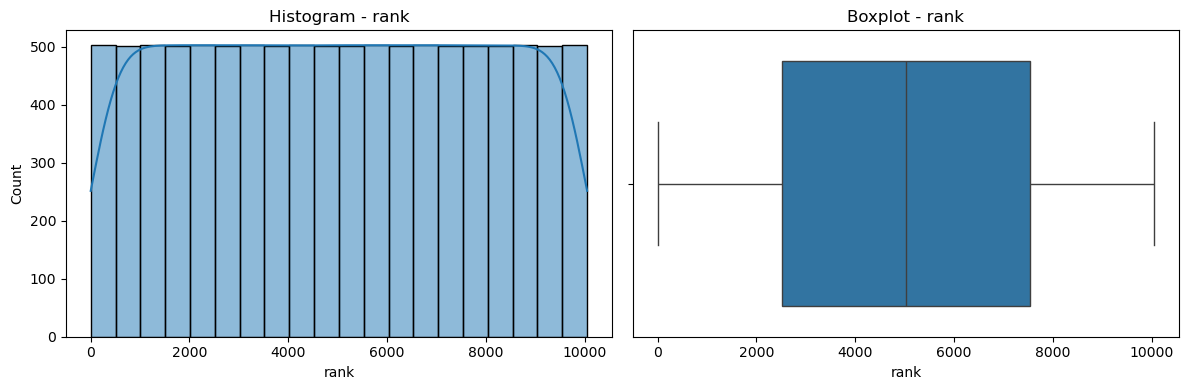

count    10048.000000
mean      5025.305832
std       2901.448335
min          1.000000
25%       2512.750000
50%       5025.500000
75%       7537.250000
max      10050.000000
Name: rank, dtype: float64
Min value is reasonable
Max value is reasonable
Empty DataFrame
Columns: [Value, Label]
Index: []
Missing values: 0 / 10048 (0.00%)
Invalid values: Series([], Name: rank, dtype: int64)
Placeholder values: 998    999
Name: rank, dtype: int64
Distribution shape:  Left


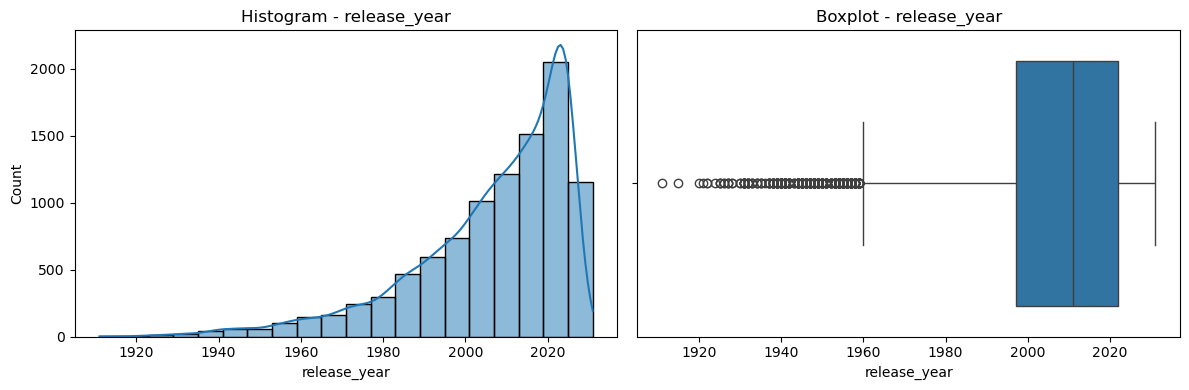

count    9880.000000
mean     2006.183300
std        18.984144
min      1911.000000
25%      1997.000000
50%      2011.000000
75%      2022.000000
max      2031.000000
Name: release_year, dtype: float64
Min value is unreasonable
Max value is reasonable
        Value          Label
197    1957.0  Extreme value
342    1946.0  Extreme value
427    1939.0  Extreme value
613    1942.0  Extreme value
639    1958.0  Extreme value
...       ...            ...
9971   1943.0  Extreme value
9985   1948.0  Extreme value
9987   1949.0  Extreme value
10011  1937.0  Extreme value
10038  1931.0  Extreme value

[316 rows x 2 columns]
Missing values: 168 / 10048 (1.67%)
Invalid values: Series([], Name: release_year, dtype: float64)
Placeholder values: Series([], Name: release_year, dtype: float64)
Distribution shape:  Normal


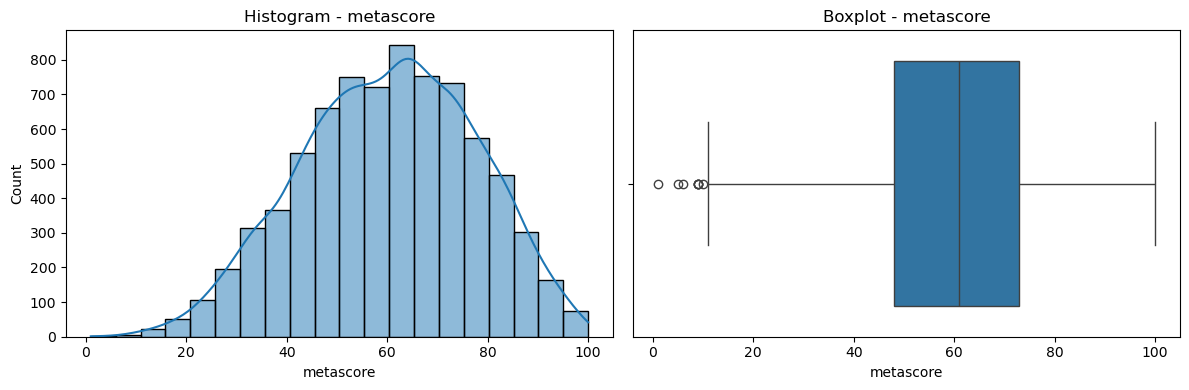

count    7638.000000
mean       60.249018
std        17.438436
min         1.000000
25%        48.000000
50%        61.000000
75%        73.000000
max       100.000000
Name: metascore, dtype: float64
Min value is unreasonable
Max value is reasonable
      Value          Label
1342    6.0  Extreme value
3686    9.0  Extreme value
3821    9.0  Extreme value
5615    9.0  Extreme value
8003    9.0  Extreme value
8219    5.0  Extreme value
8807   10.0  Extreme value
9901    1.0  Extreme value
Missing values: 2410 / 10048 (23.98%)
Invalid values: Series([], Name: metascore, dtype: float64)
Placeholder values: Series([], Name: metascore, dtype: float64)
Distribution shape:  Left


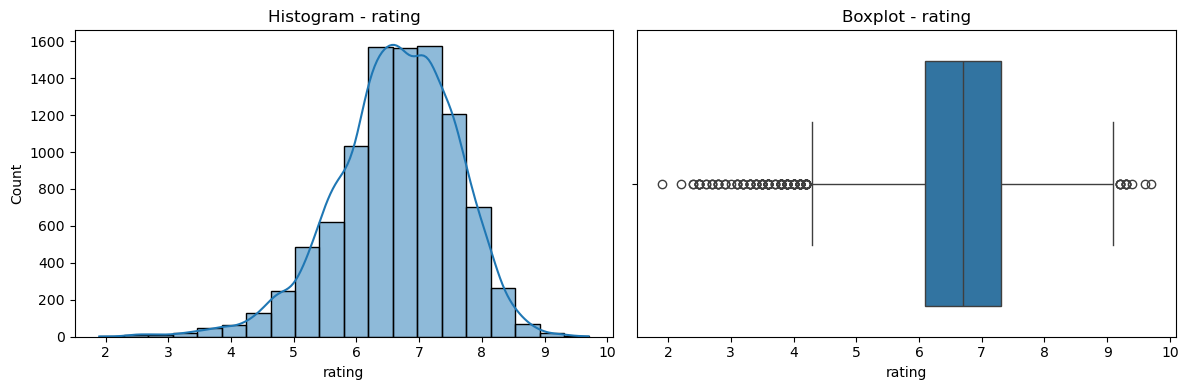

count    9636.000000
mean        6.635430
std         0.958081
min         1.900000
25%         6.100000
50%         6.700000
75%         7.300000
max         9.700000
Name: rating, dtype: float64
Min value is unreasonable
Max value is unreasonable
       Value          Label
45       9.3  Extreme value
69       9.2  Extreme value
74       3.9  Extreme value
209      4.2  Extreme value
324      4.1  Extreme value
...      ...            ...
9954     3.5  Extreme value
10000    4.2  Extreme value
10003    4.0  Extreme value
10030    3.2  Extreme value
10042    3.1  Extreme value

[162 rows x 2 columns]
Missing values: 412 / 10048 (4.10%)
Invalid values: Series([], Name: rating, dtype: float64)
Placeholder values: Series([], Name: rating, dtype: float64)


In [17]:
for col in numerical_cols:
    numerical_columns_analysis(col)

### Phân tích trên các cột dữ liệu thuộc loại categorical

In [26]:
df['mpa'] = df['mpa'].astype('category')
df['genres'] = df['genres'].astype('category')

# Lấy danh sách các cột categorical
category_cols = df.select_dtypes(include=['category']).columns
category_cols

Index(['genres', 'mpa'], dtype='object')

In [45]:


def category_analysis(col):
    if col == 'genres':
        # Split để tạo list
        df['genres_list'] = df[col].str.split(', ')
        # Explode nhưng KHÔNG ghi đè df gốc
        temp = df.explode('genres_list')
        col_to_analyze = 'genres_list'
    else:
        temp = df.copy()
        col_to_analyze = col

    print("="*60)
    print(f"ANALYSIS FOR COLUMN: {col}")
    print("="*60)

    # Unique values
    print("\nUnique/distinct values:")
    print(temp[col_to_analyze].unique())
    
    # Number of unique values
    print("\nNumber of unique values:")
    print(temp[col_to_analyze].nunique())

    # Top 10 most frequent
    print("\nTop 10 most frequent values:")
    print(temp[col_to_analyze].value_counts().head(10))

    # Normalized frequency %
    print("\nPercentage distribution:")
    print((temp[col_to_analyze].value_counts(normalize=True) * 100).head(10))

    # Balance check
    print("\nBalance check:")
    dist = temp[col_to_analyze].value_counts(normalize=True) * 100
    max_ratio = dist.iloc[0]

    if max_ratio > 80:
        print("Distribution is **highly imbalanced**.")
    elif max_ratio > 50:
        print("Some imbalance present.")
    else:
        print("Distribution is fairly balanced.")

    missing_pct = df[col].isna().mean() * 100
    print(f"\nMissing values: {missing_pct:.2f}%")

    freq = temp[col_to_analyze].value_counts()
    rare = freq[freq < 5]     
    print("\nRare categories:")
    print(rare);

    # Visualization
    plt.figure(figsize=(10, 5))
    ax = temp[col_to_analyze].value_counts().head(10).plot(kind='barh')
    ax.bar_label(ax.containers[0], padding=3)
    plt.title(f"\nTop 10 Frequent Values in '{col}'")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show();



ANALYSIS FOR COLUMN: genres

Unique/distinct values:
['Drama' 'Fantasy' 'Horror' 'Sci-Fi' 'Action' 'Crime' 'Thriller'
 'Adventure' 'Comedy' 'Biography' 'History' 'War' 'Music' 'Romance'
 'Mystery' 'Western' 'Animation' 'Family' 'Musical' 'Sport' nan
 'Documentary' 'Film-Noir' 'News']

Number of unique values:
23

Top 10 most frequent values:
genres_list
Drama        5695
Thriller     3342
Comedy       3169
Action       2304
Romance      2015
Crime        1874
Adventure    1688
Horror       1574
Mystery      1442
Sci-Fi       1225
Name: count, dtype: int64

Percentage distribution:
genres_list
Drama        19.022011
Thriller     11.162697
Comedy       10.584856
Action        7.695648
Romance       6.730352
Crime         6.259394
Adventure     5.638131
Horror        5.257357
Mystery       4.816460
Sci-Fi        4.091653
Name: proportion, dtype: float64

Balance check:
Distribution is fairly balanced.

Missing values: 1.32%

Rare categories:
genres_list
News    1
Name: count, dtype: int64

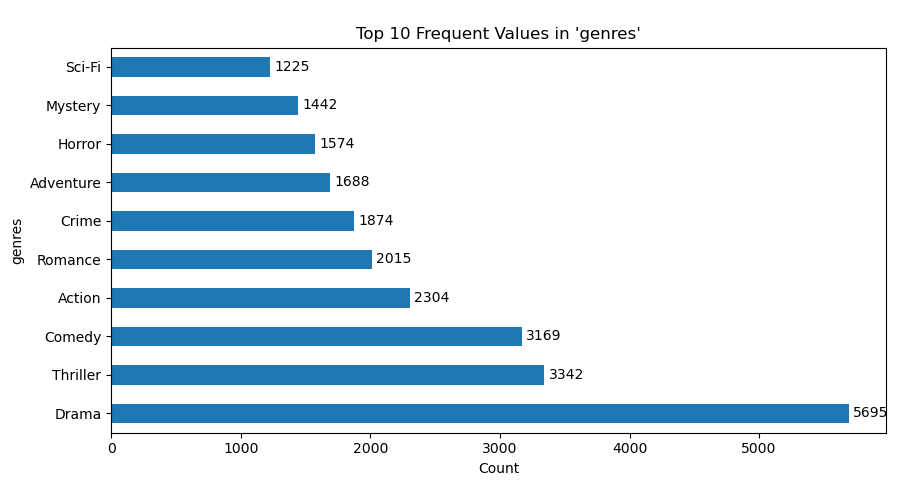

ANALYSIS FOR COLUMN: mpa

Unique/distinct values:
['R', 'PG-13', NaN, 'PG', 'TV-PG', ..., '16+', 'M', 'TV-Y7', 'MA-17', 'TV-Y']
Length: 24
Categories (23, object): ['13+', '16+', '18+', 'Approved', ..., 'TV-Y', 'TV-Y7', 'Unrated', 'X']

Number of unique values:
23

Top 10 most frequent values:
mpa
R            3763
PG-13        2005
PG           1109
Not Rated     746
Approved      297
TV-MA         256
G             192
Unrated       124
TV-14          89
TV-PG          37
Name: count, dtype: int64

Percentage distribution:
mpa
R            43.173474
PG-13        23.003671
PG           12.723726
Not Rated     8.558972
Approved      3.407526
TV-MA         2.937127
G             2.202845
Unrated       1.422671
TV-14         1.021111
TV-PG         0.424507
Name: proportion, dtype: float64

Balance check:
Distribution is fairly balanced.

Missing values: 13.26%

Rare categories:
mpa
16+      4
M/PG     4
X        4
TV-Y7    3
MA-17    1
TV-Y     1
Name: count, dtype: int64


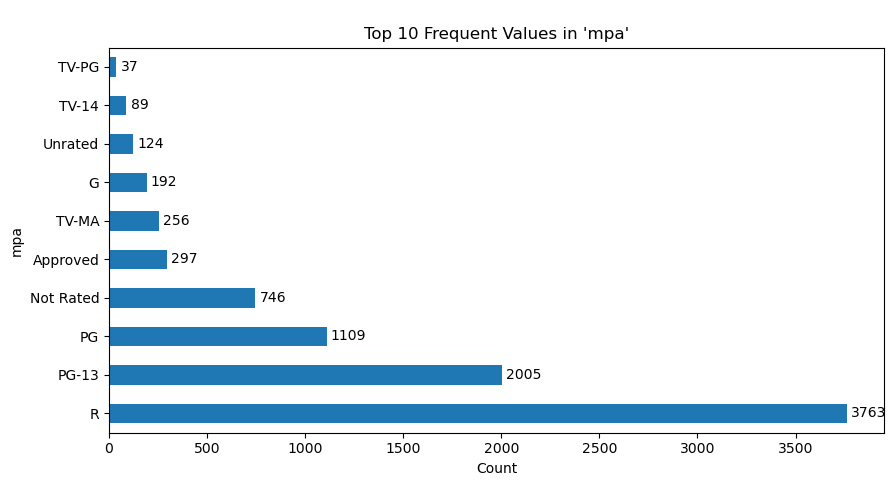

In [47]:
for col in category_cols:
    category_analysis(col);

### Phân tích cho missing values

### Phân tích mỗi quan hệ và tương quan 

### Nhận định sơ bộ ban đầu về dữ liệu